In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Exercises

#### 1.1. 

The velocity of a freely falling object near Earth's surface is described by the equation

$$ \frac{dv}{dt} = -g $$

where $v$ is the velocity and $g = 9.8 m/s^2$ is the acceleration due to gravity. Calculate $v$ as a function of $t$. Assume initial velocity is zero and calculate the solution for times $t = 0$ to $t = 10$ s. Repeat the calculation for a few values of dt and compate with the exact solution. 

---
*my work*

$$\frac{dv}{dt} \approx \frac{v(t+\Delta t) - v(t)}{\Delta t}$$
$$v(t+\Delta t) \approx v(t) + \frac{dv}{dt}\Delta t$$
$$v(t+\Delta t) \approx v(t) - g\Delta t$$

The analytical solution being used is $v = v_0 - g \cdot t$.

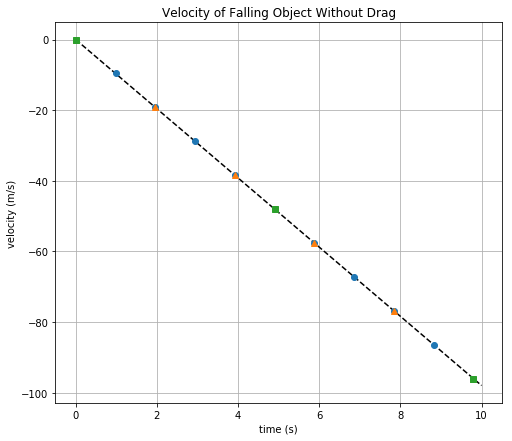

In [2]:
# Initialize variables
g = 9.8    # m/sec^2
dt = g * np.array([1/10, 1/5, 1/2])    # time steps, sec
v0 = 0    # initial velocity, m/sec
t0 = 0    # initial time, sec
tf = 10    # final time, sec
marker = ['o','^','s']    # for plotting

# Analytic solution
t_analytic = np.arange(0,10,0.001)
v_analytic = v0 - g*t_analytic
fig = plt.figure(figsize=(8,7))
plt.plot(t_analytic, v_analytic, 'k--')

# Euler loop
for n in range(dt.size):
    t = np.arange(t0,tf,dt[n])
    v = np.zeros(t.size)
    v[0] = v0
    for i in range(t.size-1):
        v[i+1] = v[i] - g*dt[n]
        t[i+1] = t[i] + dt[n]
    plt.plot(t,v,marker[n])

# Make plots
plt.grid()
plt.xlabel('time (s)')
plt.ylabel('velocity (m/s)')
plt.title('Velocity of Falling Object Without Drag')
plt.show()

#### 1.2.

The position of an object moving horizontally with a constant velocity, $v$, is described by the equation

$$\frac{dx}{dt} = v$$

Assuming that the velocity is a constant, say $v = 40$ m/s, use the Euler method to solve [the above equation] for x as a function of time. Compare your results with the exact solution. 

---
*my work* 

$v = 40$ m/s, so we'd want a time step considerably faster than one second to have good $x$-resolution. Ten seconds seems like a decent enough amount of time to run for.

It is trivial to see that the difference euation needed for the Euler loop is 

$$x(t+\Delta t) \approx x(t) + v\Delta t$$

The analytical solution being used here is $x = x_0 + v \cdot t$.

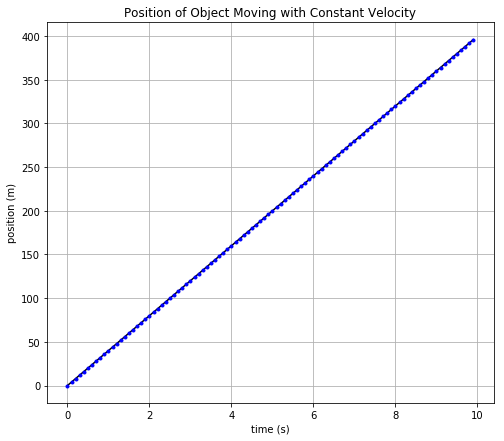

In [3]:
# initialize variables
v = 40    # m/s
x0 = 0
t0 = 0
tf = 10
dt = 1/(10)    # should yield four meters per time step. dt was only made this coarse for visibility
t = np.arange(t0, tf, dt)
x = np.zeros(t.size)
x[0] = x0

# exact solutionx
xact = x0 + v*t

# euler loop
for i in range(t.size-1):
    x[i+1] = x[i] + v*dt
    
# plot
fig = plt.figure(figsize=(8,7))
plt.plot(t,xact,'k')
plt.plot(t,x,'b.')
plt.grid()
plt.xlabel('time (s)')
plt.ylabel('position (m)')
plt.title('Position of Object Moving with Constant Velocity')
plt.show()

#### 1.3

Here we consider a very simple example in which the frictional force depends on the velocity. Assume that the velocity of an object obeys an equation of the form

$$ \frac{dv}{dt} = a - bv $$

where $a$ and $b$ are constants. you could think of $a$ as coming from an applied force, such as gravity, while $b$ arises from friction. Use the Euler method to solve the above equation for $v$ as a function of time. A convenient choice of parameters is $a=10$ and $b=1$. You should find that $v$ approaches a constant value at long times; this is called the terminal velocity. 

---
*my work*

It should be noted that in using the Euler method, all difference equations will be of the form

$$f(t+\Delta t) \approx f(t) + \frac{df}{dt}\Delta t$$

given an $f$ and some differential equation that it obeys. $t$ may or may not be the differentiating variable. Therefore, the difference equation here is

$$ v(t + \Delta t) \approx v(t) + (a-bv(t)) \Delta t$$

Although the problem doesn't call for it explicitly, I think it would be a worthwhile exercise to work out the exact solution. **See notes on *Boyce and DiPrima* chapter 1.2 for derivation of exact solution.**

For us, $a' = -b$ and $b' = -a$. Therefore our analytical solution is

$$ v(t) = \frac{a}{b} + [v_0 - \frac{a}{b}]e^{-bt} $$

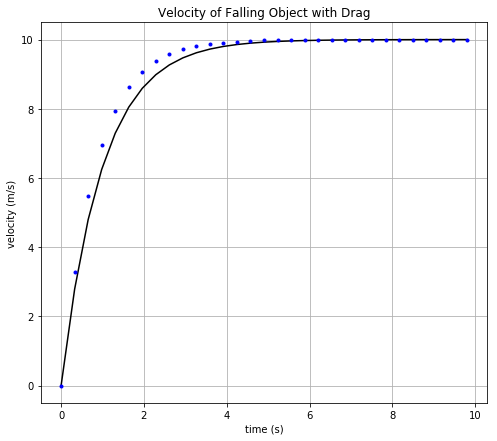

In [4]:
# initialize variables
v0 = 0    # m/s
t0 = 0    # s
tf = 10    # s, this will have to be iterated to see terminal velocity
dt = 9.8/30
t = np.arange(t0, tf, dt)
v = np.zeros(t.size)
v[0] = v0
a = 10
b = 1

# exact solution
v_exact = (a/b) + (v0 - (a/b)) * np.exp(-1*b*t)

# Euler loop
for i in range(t.size-1):
    v[i+1] = v[i] + (a-b*v[i])*dt
    
# plot
fig = plt.figure(figsize=(8,7))
plt.plot(t,v_exact, 'k')
plt.plot(t,v,'b.')
plt.grid()
plt.xlabel('time (s)')
plt.ylabel('velocity (m/s)')
plt.title('Velocity of Falling Object with Drag')
plt.show()

This problem is an example where you can see the error change with step size. With smaller values of $dt$, the Euler method reaches terminal velocity much quicker than the exact solution.

#### 1.4

Recall the nuclear decay problem. Suppose there are two type of nuclei, $A$ and $B$, and that $A$ decays into $B$ which then also decays. This obeys the equations

$$\frac{dN_A}{dt} = -\frac{N_A}{\tau_A},$$
$$\frac{dN_B}{dt} = \frac{N_A}{\tau_A} - \frac{N_B}{\tau_B}$$

Use the Euler method to solve the coupled equation. Determine the exact result and compare. 

---
*my work*

The analytic solution for $N_A$ is the same as the one discussed in the chapter

$$N_A(t) = N_A(0) e^{-t/\tau_A},$$

$N_B(t)$ is a little trickier to solve. **See notes on Boyce and DiPrima chapter 2.1 for derivation.** Given an equation of the form 

$$\frac{dy}{dt} + ay = g(t) $$

the solution is

$$ y = e^{-at}\int\limits_{t_0}^te^{as}g(s)ds + ce^{-at} $$

For this problem, $g(t) = N_A(t)$ and $1 = 1/\tau_B$. Evaluate the integral with $t_0 = 0$.

$$\int\limits_0^te^{as}g(s)ds = N_A(0)\int\limits_0^te^{s/\tau_B}e^{-s/\tau_A}ds$$
$$ = N_A(0)\int\limits_0^t e^{s\frac{\tau_A-\tau_B}{\tau_A\tau_B}}ds$$
$$ = N_A(0)\frac{\tau_A\tau_B}{\tau_A-\tau_B}e^{t\frac{\tau_A-\tau_B}{\tau_A\tau_B}}$$

For simplicity, let $\tau' = \frac{\tau_A\tau_B}{\tau_A-\tau_B}$. Then, 

$$N_B(t) = e^{-t/\tau_B}N_A(0)\tau'e^{t/\tau'}+ce^{-t/\tau_B}$$

Set $t=0$ to find that $c = N_B(0) - N_A(0)\tau'$. Finally, the expression for the population of nucleus $B$ as a function of time is

$$ N_B(t) = e^{-t/\tau_B}(N_A(0)\tau'e^{t/\tau'} + N_B(0) - N_A(0)\tau') $$

Initial conditions aren't given, so let $N_A(0) = 100$ and $N_B(0) = 0$. Let $\tau_A = 1$ and $\tau_B = 2$.

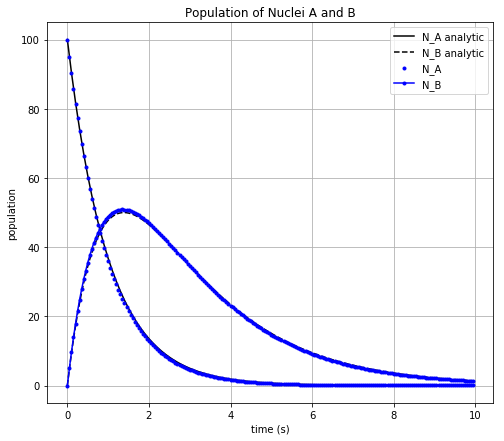

In [3]:
# initialize variables
N_A0 = 100
N_B0 = 0
t0 = 0
tf = 10
dt = 5e-2
taua = 1
taub = 2

t = np.arange(t0, tf, dt)
N_A = np.zeros(t.size)
N_A[0] = N_A0
N_B = np.zeros(t.size)
N_B[0] = N_B0

# exact solution
NA_x = N_A0 * np.exp(-1*t/taua)
TAU = (taua*taub)/(taua-taub)
c = N_B0 - N_A0 * TAU
NB_x = np.exp(-1*t/taub) * (N_A0*TAU*np.exp(t/TAU) + c)

# euler loop
for i in range(t.size - 1):
    N_A[i+1] = N_A[i] - (N_A[i]/taua)*dt
    dNB = (N_A[i]/taua) - (N_B[i]/taub)
    N_B[i+1] = N_B[i] + dNB*dt

#plots
fig = plt.figure(figsize=(8,7))
plt.plot(t,NA_x,'k', label='N_A analytic')
plt.plot(t,NB_x,'k--', label='N_B analytic')
plt.plot(t,N_A,'b.', label='N_A')
plt.plot(t,N_B,'b.-', label='N_B')
plt.legend()
plt.grid()
plt.xlabel('time (s)')
plt.ylabel('population')
plt.title('Population of Nuclei A and B')
plt.show()